In [1]:
import numpy as np 
import pandas as pd 

In [4]:
data = pd.read_csv('uberdt.csv')

In [5]:
import matplotlib.pyplot as plt


In [28]:
data.head()

,,DATA_INICIO,DATA FIM,CATEGORIA,INICIO_CORRIDA,FIM_CORRIDA,PROPOSITO
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,8.207634,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,8.046700,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,7.724832,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,7.563898,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,102.514958,Customer Visit


In [27]:
data['MILES'] = data['MILES'] * 1.60934


<class 'KeyError'>: 'MILES'

In [26]:
data.head()

,,DATA_INICIO,DATA FIM,CATEGORIA,INICIO_CORRIDA,FIM_CORRIDA,PROPOSITO
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,8.207634,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,8.046700,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,7.724832,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,7.563898,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,102.514958,Customer Visit


In [32]:
novos_nomes = ['DATA_INICIO','DATA FIM', 'CATEGORIA', 'INICIO_CORRIDA', 'FIM_CORRIDA','KM', 'PROPOSITO']

In [33]:
data.columns = novos_nomes


In [34]:
data.head()


,DATA_INICIO,DATA FIM,CATEGORIA,INICIO_CORRIDA,FIM_CORRIDA,KM,PROPOSITO
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,8.207634,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,8.046700,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,7.724832,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,7.563898,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,102.514958,Customer Visit


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DATA_INICIO     1156 non-null   object 
 1   DATA FIM        1155 non-null   object 
 2   CATEGORIA       1155 non-null   object 
 3   INICIO_CORRIDA  1155 non-null   object 
 4   FIM_CORRIDA     1155 non-null   object 
 5   KM              1156 non-null   float64
 6   PROPOSITO       653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 36.2+ KB


In [36]:
data.describe()

,KM
count,1156.000000
mean,33.981854
std,578.234265
min,0.804670
25%,4.667086
50%,9.656040
75%,16.737136
max,19641.511898


In [38]:
data['CATEGORIA'].value_counts()


Business    1078
Personal      77
Name: CATEGORIA, dtype: int64

In [41]:
total_KM = data['KM'].sum()
total_KM = round(total_KM, 2)
print('Total Kilometros dirigido:', total_KM)


Total Kilometros dirigido: 39283.02


In [43]:
media_km_viagens = data['KM'].mean()
media_km_viagens = round(media_km_viagens, 2)
print('Média de kilometros por viagens:', media_km_viagens)


Média de kilometros por viagens: 33.98


In [ ]:
Visualização de Dados

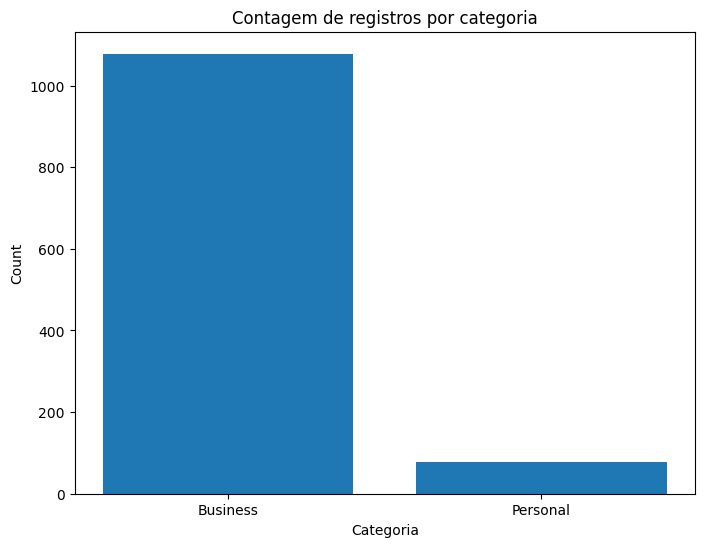

In [45]:
category_counts = data['CATEGORIA'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Categoria')
plt.ylabel('Count')
plt.title('Contagem de registros por categoria')
plt.show()

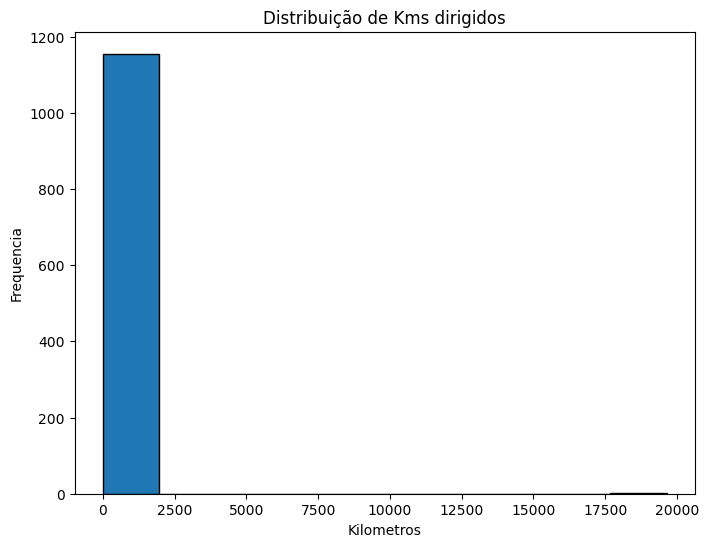

In [51]:
plt.figure(figsize=(8, 6))
plt.hist(data['KM'], bins=10, edgecolor='black')
plt.xlabel('Kilometros')
plt.ylabel('Frequencia')
plt.title('Distribuição de Kms dirigidos')
plt.show()


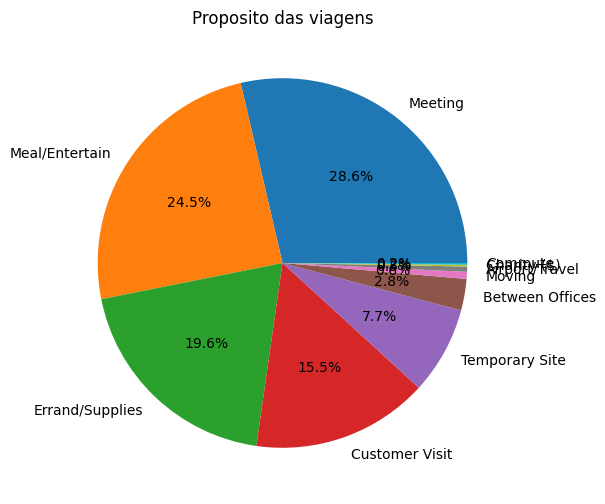

In [57]:
purpose_counts = data['PROPOSITO'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(purpose_counts.values, labels=purpose_counts.index, autopct='%1.1f%%')
plt.title('Proposito das viagens')
plt.show()

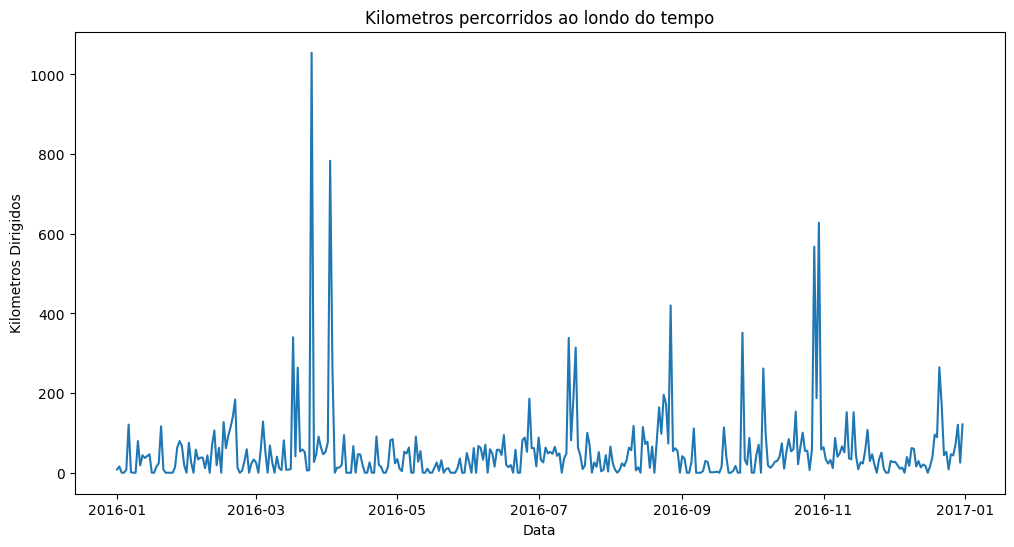

In [61]:
data = data[data['DATA_INICIO'] != "Totals"]

data['DATA_INICIO'] = pd.to_datetime(data['DATA_INICIO'])

data.set_index('DATA_INICIO', inplace=True)

km_diario = data.resample('D')['KM'].sum()

plt.figure(figsize=(12, 6))
plt.plot(km_diario.index, km_diario.values)
plt.xlabel('Data')
plt.ylabel('Kilometros Dirigidos')
plt.title('Kilometros percorridos ao londo do tempo')
plt.show()


<Figure size 1000x600 with 0 Axes>

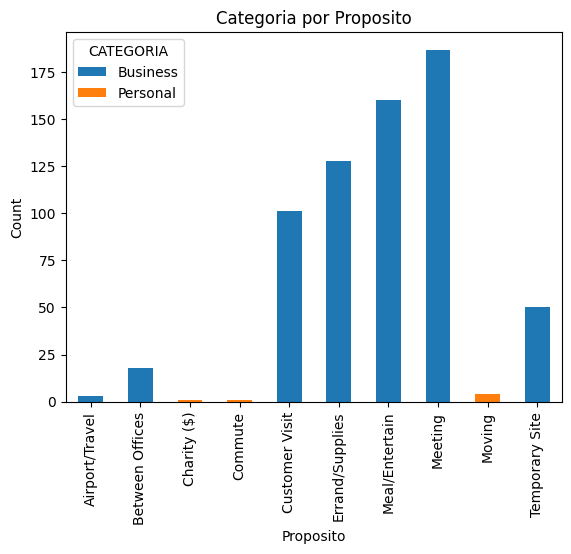

In [64]:
categoria_proposito = data.pivot_table(index='PROPOSITO', columns='CATEGORIA', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 6))
categoria_proposito.plot(kind='bar', stacked=True)
plt.xlabel('Proposito')
plt.ylabel('Count')
plt.title('Categoria por Proposito')
plt.legend(title='CATEGORIA')
plt.show()


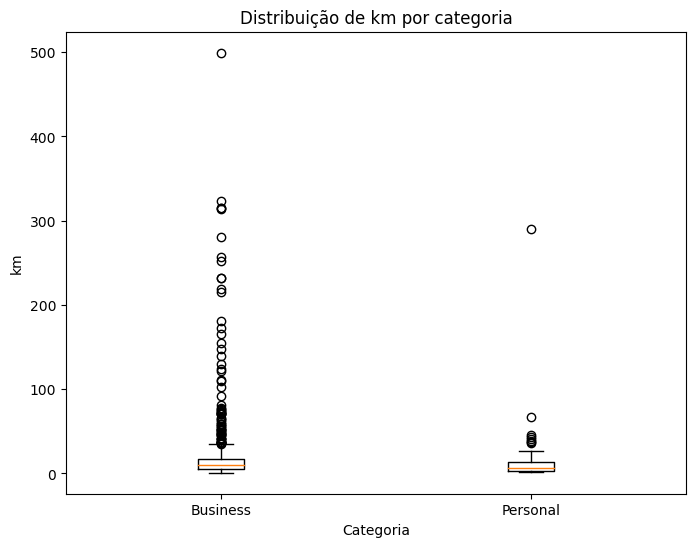

In [65]:
plt.figure(figsize=(8, 6))
plt.boxplot([data[data['CATEGORIA'] == 'Business']['KM'], data[data['CATEGORIA'] == 'Personal']['KM']], 
            labels=['Business', 'Personal'])
plt.xlabel('Categoria')
plt.ylabel('km')
plt.title('Distribuição de km por categoria')
plt.show()


In [ ]:
Treinamento de Modelo

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.impute import SimpleImputer
from catboost import CatBoostRegressor
import lightgbm as lgb


<class 'ModuleNotFoundError'>: No module named 'catboost'

In [70]:
import piplite
await piplite.install('seaborn')
await piplite.install('xgboost')


In [71]:
import seaborn as sns

In [76]:
data = pd.read_csv('uberdt.csv')


In [77]:
features = ['DATA_INICIO', 'FIM_CORRIDA', 'CATEGORIA', 'PROPOSITO']


In [ ]:
novos_nomes = ['DATA_INICIO','DATA FIM', 'CATEGORIA', 'INICIO_CORRIDA', 'FIM_CORRIDA','KM', 'PROPOSITO']

In [80]:
data.columns = novos_nomes


In [81]:
data.head()

,DATA_INICIO,DATA FIM,CATEGORIA,INICIO_CORRIDA,FIM_CORRIDA,KM,PROPOSITO
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [82]:
X = data[features]
X = pd.get_dummies(X) 
y = data['KM']


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [122]:
await piplite.install('lightGBM')



In [124]:
models = {
    'Regresão Linear': LinearRegression(),
    'Arvore de Decisão': DecisionTreeRegressor(),
    'Floresta Aleatoria': RandomForestRegressor(),
    'SVR': SVR(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': LGBMRegressor(),
    'Regressor de aumento de gradiente': GradientBoostingRegressor(),
    'ADA Boost': AdaBoostRegressor(),
    'Linear SVR': LinearSVR(),
}


Results for Regresão Linear:
Mean Squared Error: 1531.7391702989996
R-squared Score: -2.5652116829445357


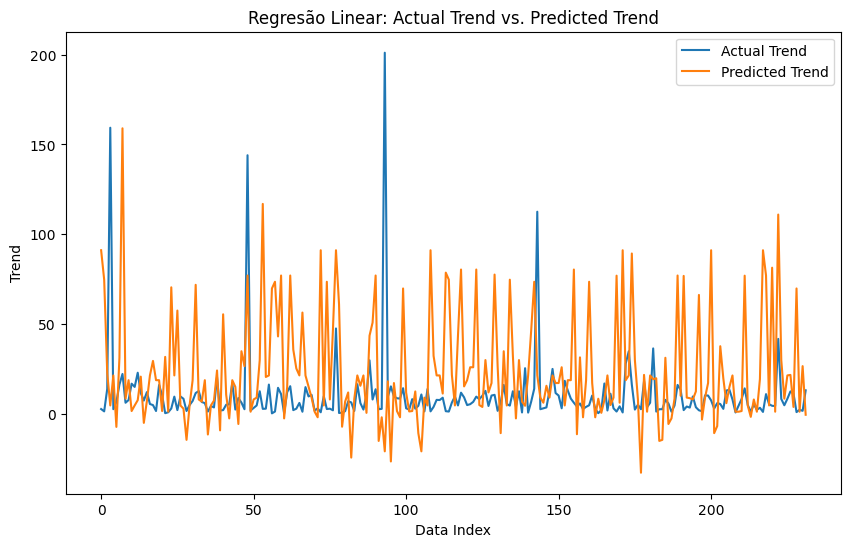


Results for Arvore de Decisão:
Mean Squared Error: 438.5383189655172
R-squared Score: -0.02072335062732855


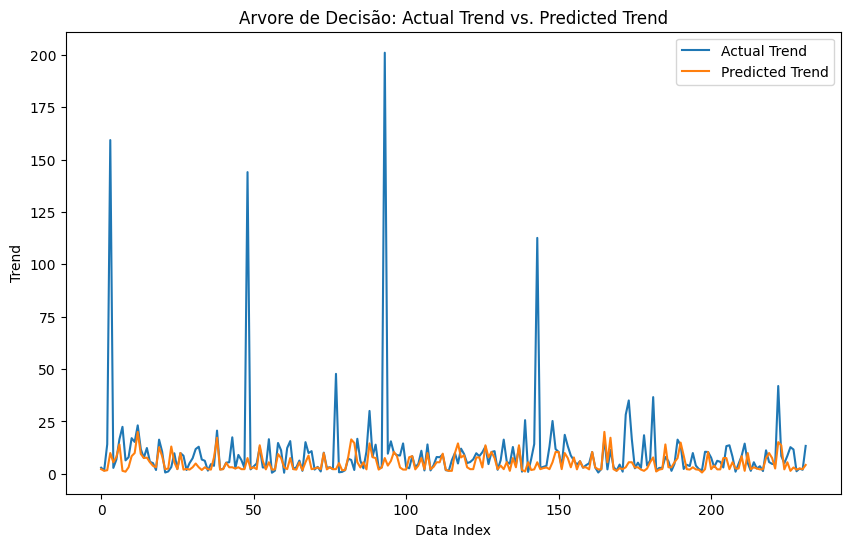


Results for Floresta Aleatoria:
Mean Squared Error: 430.33879149568975
R-squared Score: -0.001638475279819529


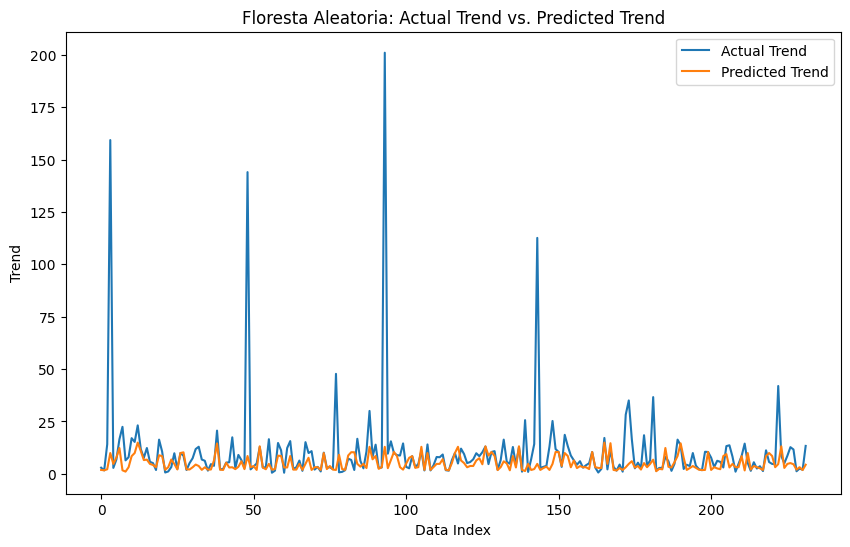


Results for SVR:
Mean Squared Error: 429.6269412742163
R-squared Score: 1.8397362282152052e-05


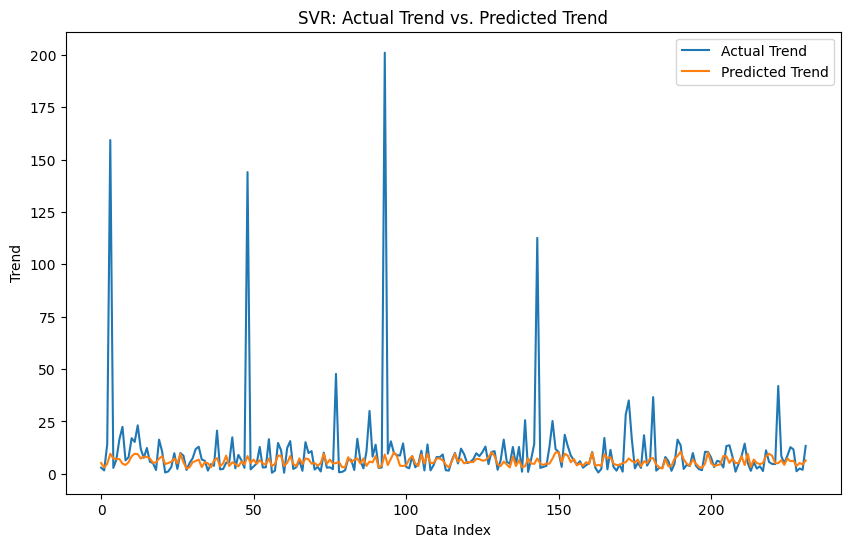


Results for XGBoost:
Mean Squared Error: 412.24532108823877
R-squared Score: 0.040475125607636886


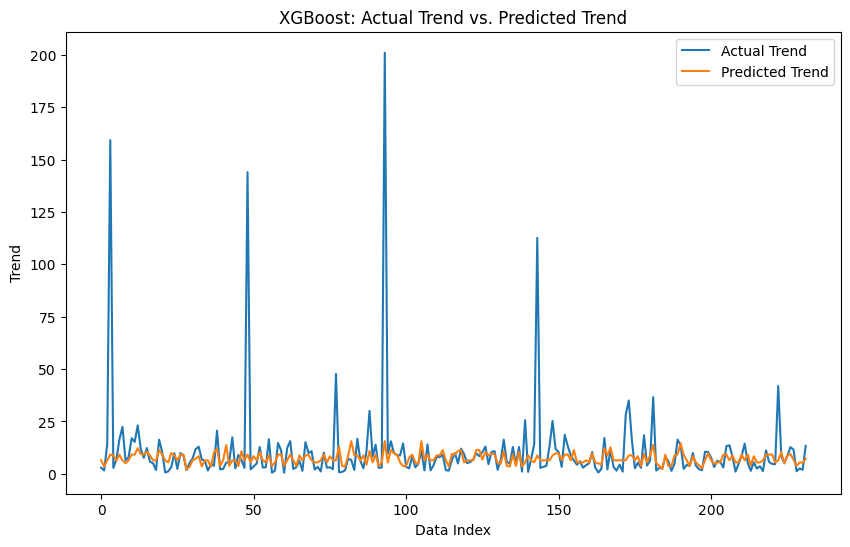

In [ ]:
Name = ['Regrwsão Linear','Arvore de Decisão','Floresta Aleatoria','SVR','XGBoost','LightGBM','Regressor de aumento gradiente' ,'ADA Boost','Linear SVR']
accuracy = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Results for {name}:")
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared Score: {r2}")
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
    plt.plot(np.arange(len(y_test)), y_pred, label='Predicted Trend')
    plt.xlabel('Data Index')
    plt.ylabel('Trend')
    plt.title(f'{name}: Actual Trend vs. Predicted Trend')
    plt.legend()
    plt.show()
    accuracy.append(r2)
    print()